# Lab 2: RNA coarse grained molecule 3d plot 🪢

Since the coarse grained RNA molecule has been defined and demonstratd previously, out goal in this notebook is to portray it in 3D. We will use the `matplotlib` library to plot the molecule in 3D.

To deal with the multiple atom conformations of a particular position, the atom with highest occupancy will be chosen as representative (`max_occupancy_atom` function). By default, teh representative of each residue will be the C alpha atom of highest occupancy.

For that several helper functions has been implemented:

- `max_occupancy_atom`: takes a list of atoms and returns the atom with highest occupancy 
- `chain_to_atom_list`: takes a chain and returns a list of atoms
- `atoms_to_coordinates`: takes a list of atoms and returns a list of coordinates (3-tuples of floats)
- `get_chain_residue_coordinates`: takes a chain and returns a list of coordinates (3-tuples of floats) of the representative atoms of each residue
- `plot_chain_residue_coordinates`: takes a chain and plots the representative atoms of each residue in 3D

The molecule to be plotted is the RNA molecule from the previous lab as example (PDB ID: 7AEF)

## Set up

In [6]:
import os,sys
sys.path.append(os.path.abspath('../src'))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from IO.RNA_IO import RNA_IO
from utils import pathify_pdb

Functions to extract the coordinates directly from the chain

In [9]:
# -- useful functionalities

def max_occupancy_atom(atoms_of_res):
    '''takes a list of atoms of different conformations (type Atom) and returns the atom with the highest occupancy'''
    max_occ_atom=None
    max_occ=0
    for atom in atoms_of_res:
        if atom.occupancy>max_occ:
            max_occ=atom.occupancy
            max_occ_atom=atom
    return max_occ_atom

def chain_to_atom_list(chain):
    '''takes a chain and returns a list of atoms'''
    res_list=chain.get_residues()
    atom_list=[]
    for _ in range(1,1+len(res_list)):
        res=res_list[_]
        atoms_of_res=list(res.get_atoms().values())
        atom_of_res=max_occupancy_atom(atoms_of_res)
        atom_list.append(atom_of_res)
    return atom_list

def atoms_to_coordinates(atoms):
    '''takes a list of Atom objects and retuns a list of 3-tuples of coordinates'''
    coordinates=[]
    for atom in atoms:
        x,y,z=atom.x,atom.y,atom.z
        coordinates.append((x,y,z))
    return coordinates

def chain_to_coordinates(chain):
    '''takes a chain and returns a list of 3-tuples of coordinates'''
    atom_list=chain_to_atom_list(chain)
    return atoms_to_coordinates(atom_list)

def get_chain_residue_coordinates(chain):
    '''
    takes a Chain object and returns a (contiguous) list of residues coordinates in 3-tuple format -> [(x1,y1,z1),...,(xn,yn,zn)]

    _note, res coordinates are in fact c alpha coordinates_
    '''
    res_list=chain.get_residues()
    res_coords=[]
    for _ in range(1,len(res_list)+1):
        res=res_list[_]
        c_atom=list(res.get_atoms().values())
        res_coords.append((c_atom[0].x,c_atom[0].y,c_atom[0].z))
    return res_coords

def plot_chain_residue_coordinates(res_coords):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x,y,z=zip(*res_coords)
    ax.plot(x,y,z)
    plt.show()

## Example from chain A of 7eaf:

### reading file

In [5]:
rna_io=RNA_IO()
pdb_path=pathify_pdb('7EAF')
cg_mol=rna_io.read(pdb_path, "PDB", coarse_grained=True, atom_name="C1'") #atom_name is optional, default is "C1'"


>> initializing new species: CALDANAEROBACTER SUBTERRANEUS SUBSP. TENGCONGENSIS <<


### retrieving chain A

In [7]:
model_0=cg_mol.get_models()[0]
cg_chainA=model_0.get_chains()['A']

### plotting

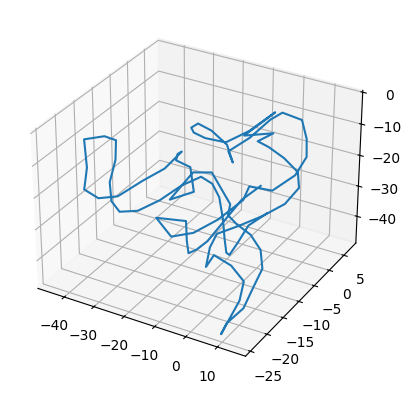

In [11]:
res_coords=get_chain_residue_coordinates(cg_chainA)
plot_chain_residue_coordinates(res_coords)

Possible extensions:

* enhancement of plot, use of other libraries, colors, styles, make it interactive...
* make the functions methods in repsective classes and add plotting utilities to utils or viz modules
